In [1]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

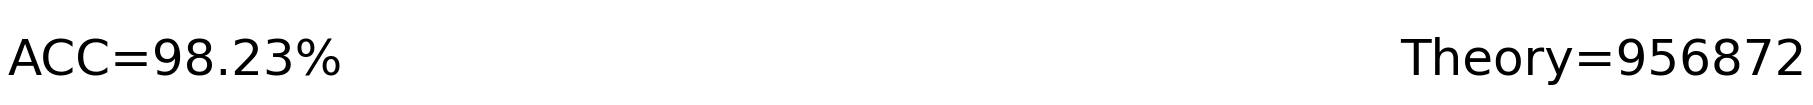

In [39]:
fig = plt.figure(figsize=(32,1.67))
canvas = FigureCanvas(fig)
ax = fig.gca()
ax.text(0.0,0.25,"ACC=98.23%", fontsize=50)
ax.text(0.78,0.25,"Theory=956872", fontsize=50)
ax.axis('off')
plt.savefig("1.png")

In [40]:
img = cv2.imread("1.png")
img = cv2.resize(img, (1920, 100))
(h, w) = img.shape[:2]
size = (w, h)
fps = 11.988
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
video = cv2.VideoWriter("1.avi", fourcc, fps, size, isColor=True)
video.write(img)
video.release()

In [ ]:
#DEBUG MAIN
from note_solve import NoResult, solve_eqn, solve_pre
import time
from ocr import ocr_score
from solve import solve_n_export
from tqdm import tqdm
import os
def reduce(judge_list):
    #reduce bad
    i,j=1,0
    bad_list = [judge[1][2] for judge in judge_list]
    length = len(bad_list)
    try:
        while(i<length):
            #print(i,j)
            #print(bad_list)
            while(bad_list[i]>=bad_list[j]):
                i = i + 1
                j = i - 1
            while(bad_list[i]<bad_list[j]):
                bad_list[j] = bad_list[i]
                j = j - 1
            i = i + 1
            j = i - 1
    except IndexError:
        pass
    for i in range(length):
        judge_list[i][1][2] = bad_list[i]
    #reduce perfect and good
    for i in range(1,length):
        if min(judge_list[i][1]-judge_list[i-1][1])<0:
            judge_list[i][1] = judge_list[i-1][1]
    
    return judge_list

def theory(numOfNotes,judge):
    return round(1e6*(judge[0]+0.65*judge[1]+numOfNotes-sum(judge))/numOfNotes)

def accuracy(judge):
    return str(round((judge[0]+0.65*judge[1]+0.0*judge[2])/sum(judge)*100,2))+'%'


judge_list = []

select_chart = '狂喜蘭舞.LeaF.0'
select_level = 'HD'
start_actual = int(input("实际第一个音符判定时间(ms)"))
time_list = ocr_score()

#TODO: 使用缓存
note_list = solve_n_export(select_chart,select_level)
note_iter = iter(sorted(note_list.items()))

note_time,note_attr = next(note_iter)
delta = start_actual - note_time
numOfNotes = max(attr['i'] for attr in sorted(note_list.items(),reverse=True)[0][1]) + 1

for t in tqdm(time_list):
    bad = 0
    while(note_time+delta<=t[0]):
        try:
            note_time,note_attr = next(note_iter)
        except StopIteration:
            break
    pa = max(attr['i'] for attr in note_attr) + 1
    score = t[1]
    try:
        judge_list.append([t[0],solve_eqn(numOfNotes,score,bad,pa)])
    except NoResult:
        pass
    
judge_list = reduce(judge_list)

for index in tqdm(range(len(judge_list))):
    fig = plt.figure(figsize=(32,1.67))
    canvas = FigureCanvas(fig)
    ax = fig.gca()
    ax.text(0.0,0.25,"ACC="+accuracy(judge_list[index][1]), fontsize=50)
    ax.text(0.78,0.25,"Theory="+str(theory(numOfNotes,judge_list[index][1])), fontsize=50)
    ax.axis('off')
    plt.savefig("./video/"+str(round(judge_list[index][0]/1000*11.988))+".png")
    plt.close()






In [11]:
img = cv2.imread("./video/0.png")
img = cv2.resize(img, (1920, 100))
(h, w) = img.shape[:2]
size = (w, h)
fps = 11.988
fourcc = cv2.VideoWriter_fourcc(*'X264')
video = cv2.VideoWriter('output.mp4', fourcc, fps, size, isColor=True)
img_num = round(judge_list[-1][0]/1000*11.988) + 1
for i in tqdm(range(img_num)):
    path = './video/'+str(i)+'.png'
    if os.path.exists(path):
        img = cv2.imread(path)
        img = cv2.resize(img, (1920, 100))
    video.write(img)
video.release()


100%|██████████| 1848/1848 [00:08<00:00, 229.39it/s]
